# 머신러닝-생선분류
- 도메인 지식: 생선의 무게와 길이로 분류

In [1]:
# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
# 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
print(len(bream_length), len(bream_weight))

35 35


In [4]:
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

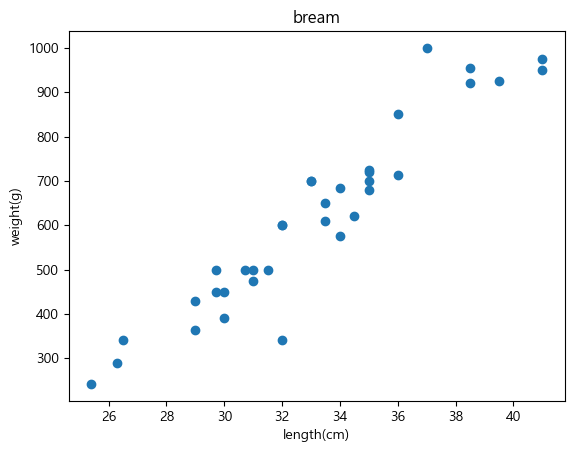

'\n(해석)\n- 우상향 분포 --> 길이와 무게가 정비례\n- 직선 형태인지 곡선형태인지 --> 점들이 많은 부분따라 선 그려보기 --> 길이와 무게가 선형(linear)관계\n'

In [14]:
# 데이터 시각화해서 데이터 분포 파악
# 산점도
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.title("bream")
plt.xlabel("length(cm)")
plt.ylabel("weight(g)")
plt.show()
"""
(해석)
- 우상향 분포 --> 길이와 무게가 정비례
- 직선 형태인지 곡선형태인지 --> 점들이 많은 부분따라 선 그려보기 --> 길이와 무게가 선형(linear)관계
"""

In [8]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
print(len(smelt_length), len(smelt_weight))

14 14


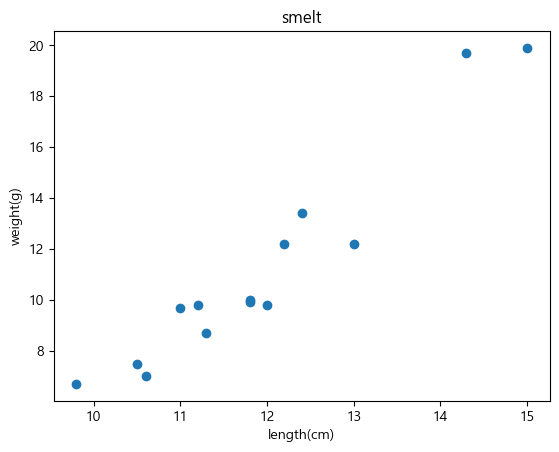

'\n(해석)\n- 우상향 --> 길이와 무게가 비례\n- 직선형태 --> linear\n- 도미와 마찬가지로 길이가 길어질수록 무게가 커지는 패턴\n'

In [16]:
plt.scatter(smelt_length, smelt_weight)
plt.title("smelt")
plt.xlabel("length(cm)")
plt.ylabel("weight(g)")
plt.show()
"""
(해석)
- 우상향 --> 길이와 무게가 비례
- 직선형태 --> linear
- 도미와 마찬가지로 길이가 길어질수록 무게가 커지는 패턴
"""

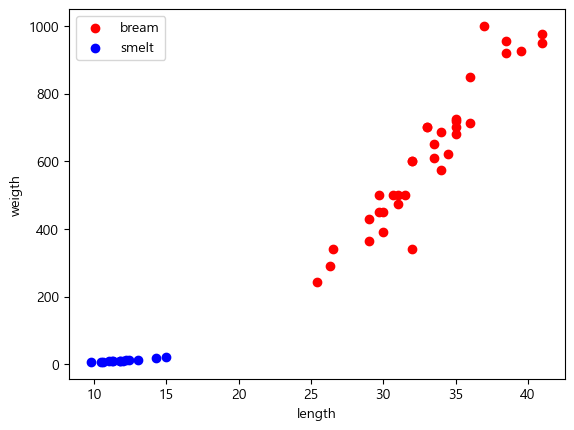

In [27]:
# 도미와 빙어 데이터의 산점도를 하나의 그래프에서 확인
plt.scatter(bream_length, bream_weight, c="red", label="bream")
plt.scatter(smelt_length, smelt_weight, c="blue", label="smelt")
plt.xlabel("length")
plt.ylabel("weigth")
plt.legend()
plt.show()

# 데이터 합치기
- 도미와 빙어의 길이 데이터 합치기: 변수 length
- 도미와 빙어의 무게 데이터 합치기: 변수 weight
- 머신러닝에서 훈련에 사용되는 데이터형태는 2차원이므로 데이터 변환

In [36]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
print(len(length), len(weight))

49 49


In [37]:
fish_data = [[l, w] for l, w in zip(length, weight)]
# fish_data = []
# for i in range(len(length)):
#     add = [length[i], weigth[i]]
#     fish_data.append(add)
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [38]:
"""
지도학습 위해 정답 만들기
- 도미와 빙어, 둘중 하나 선택 --> 이진분류(0 or 1)
- 도미 = 1, 빙어 = 0
- train data: 독립 데이터 --> 모델이 2차원으로 받음
- target data: 정답 데이터, 각 독립 데이터를 라벨링한 데이터 --> 1차원으로 사용해야함
"""
fish_target = [1]*len(bream_length) + [0]*len(smelt_length)
print(len(fish_target), fish_target)

49 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 모델 훈련 절차-ML&DL
0. 훈련데이터와 테스트데이터 생성하기(전처리)
1. 모델 생성: 객체 생성
2. 모델 훈련시키기: fit()
3. 훈련모델 성능 확인하기: score확인
4. 임의 데이터로 테스트하기: predict()


- 모델 학습하기(훈련, training): train data(독립데이터)사용
- 지도학습의 경우 독립데이터와 정답데이터(target data)를 같이 넣어줌
- accuracy(정확도)확인 == 모델 평가
- 정확도 = 1 --> 훈련모델에 과대적합 일어났다고 봄
- 좋은 모델: 0.85 <= 정확도 < 1, 정확도 = 0.9이상 --> 아주 좋은 모델
- 새로운 모델의 정확도는 해당 모델의 기준이 됨
- hyperparameter: 모델에 적용하는 속성변수, 사람이 직접 값을 지정하는 변수들
- hyperparameter 튜닝: hp값 바꿔가며 훈련 정확도 향상시키는 작업


# KNN(K-최근접이웃)알고리즘
- 가장 가까운 거리의 데이터의 값을 찾아서 분류하는 모델 --> default 5개 데이터 추출
  - n-neighbors=default 5
- 가장 가까운 데이터 추출 > 추출한 데이터의 소속 확인 > 비율 많은 쪽이 정답

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
"""
클래스 모델 객체 생성하기 == 모델 생성
"""

kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [42]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [44]:
kn.score(fish_data, fish_target)

1.0

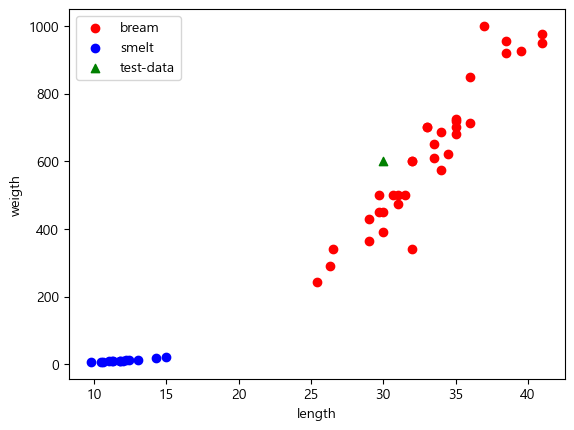

In [45]:
plt.scatter(bream_length, bream_weight, c="red", label="bream")
plt.scatter(smelt_length, smelt_weight, c="blue", label="smelt")

plt.scatter(30, 600, marker="^", c="green", label="test-data")

plt.xlabel("length")
plt.ylabel("weigth")
plt.legend()
plt.show()

In [46]:
"""
훈련모델을 이용하여 예측하기
- predict(2차원 데이터) --> 훈련데이터와 동일한 차원
- 예측할땐 target data 불필요
"""
kn.predict([[30, 600]])

array([1])

In [48]:
"""
train data, target data 확인
- ._fit_X: train data
- ._y: target data
"""
print(kn._fit_X, kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [51]:
"""
- 새로운 데이터와 가장 근접한 20개의 데이터 추출
- 추출된 20개를 0, 1로 구분하여 어느쪽이 더 많은지 확인
- 많은 쪽의 값을 최종 예측값으로 알려줌
"""
kn49 = KNeighborsClassifier(n_neighbors=20)
kn49

KNeighborsClassifier(n_neighbors=20)

In [52]:
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=20)

In [54]:
kn49.score(fish_data, fish_target)

0.9795918367346939

In [55]:
kn49.predict([[30, 600]])

array([1])

In [70]:
"""
최적의 n_neighbors값 찾기

score(): 훈련과 정확도 계산 동시에 함
"""
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

nCnt = 0
for n in range(1, len(fish_target), 2):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    if score < 1:
        nCnt = n
        print(nCnt, score)
        break

19 0.9795918367346939


In [69]:
kn = KNeighborsClassifier(n_neighbors=19)
kn.fit(fish_data, fish_target)
kn.predict([[30, 600]])

array([1])